In [1]:
print("This is a House Price Prediction Machine Learning Model")

This is a House Price Prediction Machine Learning Model


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Reading the Dataset into DataFrame 

In [4]:
df=pd.read_csv('hf.csv')
df

,square-foot,price
0,1200,135000
1,2500,275000
2,1800,198000
3,3200,350000
4,1500,165000
...,...,...
97,1185,130350
98,2685,295350
99,1785,196350
100,3085,339350


Creating Scatter Plot 

Text(0, 0.5, 'Price')

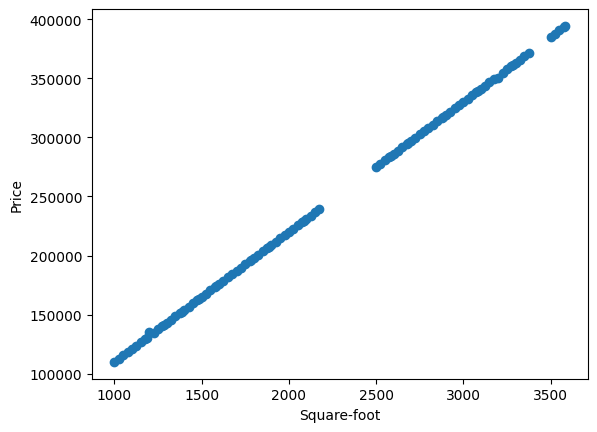

In [5]:
## Scatter plot 
plt.scatter(df['square-foot'],df['price'])
plt.xlabel('Square-foot')
plt.ylabel('Price')

Figuring out correlation

In [6]:
df.corr()

,square-foot,price
square-foot,1.000000,0.999992
price,0.999992,1.000000


Using SeaBorn for Visualization

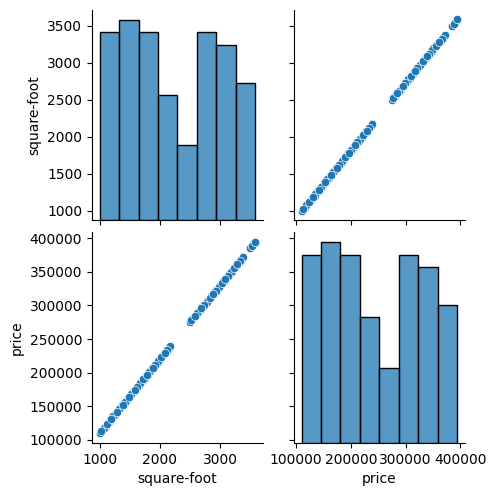

In [7]:
##Seaborn for Visualisation 
import seaborn as sns
sns.pairplot(df)

Defining Independent & Dependent Variable

In [8]:
## independent and dependent features
X = df[['square-foot']]
y = df['price']

In [9]:
X_series = df['square-foot']
np.array(X_series).shape

(102,)

In [10]:
np.array(y).shape

(102,)

Data Split for Training & Testing 

In [11]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Standardise the Data 

In [12]:
## Standardize the data
from sklearn.preprocessing import StandardScaler


In [13]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

In [14]:
X_test=scaler.transform(X_test)

In [15]:
X_test

array([[-0.31473628],
       [ 0.3012087 ],
       [-1.57904441],
       [ 1.27375342],
       [-0.44440891],
       [-1.61146257],
       [-0.52869612],
       [ 0.36604502],
       [ 0.39846318],
       [-1.41695363],
       [-1.67629888],
       [-1.48178994],
       [-1.43640452],
       [ 0.56055396],
       [ 0.43088133],
       [-1.02793574],
       [-1.12519021],
       [-0.70375417],
       [ 0.91715369],
       [-0.96309943],
       [ 1.02737543]])

Applying Linear regression Algorithm

In [16]:
## apply linear regression
from sklearn.linear_model import LinearRegression


In [17]:
regressor = LinearRegression(n_jobs=-1)
regressor.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [18]:
print("Coffeficient or Slope : ",regressor.coef_)
print("Intercept: ",regressor.intercept_)

Coffeficient or Slope :  [84799.95510797]
Intercept:  252174.07407407407


Plotting Training data

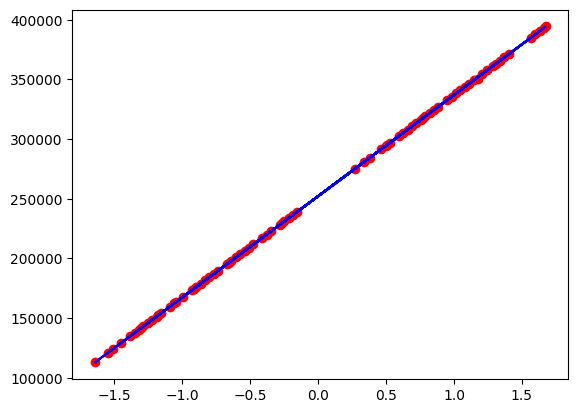

In [19]:
##plot Training Data 
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

Predicting Test Data

In [20]:
##prediction for the test data
y_pred = regressor.predict(X_test)
y_pred

array([225484.4515285 , 277716.55872285, 118271.17886642, 360188.30692445,
       214488.21843496, 115522.12059303, 207340.66692415, 283214.67526962,
       285963.73354301, 132016.47023335, 110024.00404626, 126518.35368658,
       130367.03526932, 299709.02490994, 288712.7918164 , 165005.16951399,
       156757.99469383, 192495.75224786, 329948.6659172 , 170503.28606077,
       339295.46404671])

Monitoring Performance Metrics 

In [21]:
## performance metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE : ",mse)
print("MAE : ",mae)
print("RMSE : ",rmse)

MSE :  424778.0164445525
MAE :  166.39820053326616
RMSE :  651.7499646678567


R Squared Metrics

In [22]:
#r squared
r2 = r2_score(y_test, y_pred)
print("R2 Score : ",r2)

R2 Score :  0.9999345348723846


Adjusted R Squared 

In [23]:
#adjusted r squared
adj_r2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R2 Score : ", adj_r2)

Adjusted R2 Score :  0.9999338802211084


Performing OLS Linear regression 

In [24]:
#olS Linear Regression
import statsmodels.api as sm

In [25]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.102
Model:                            OLS   Adj. R-squared (uncentered):              0.090
Method:                 Least Squares   F-statistic:                              9.046
Date:                Tue, 13 Aug 2024   Prob (F-statistic):                     0.00352
Time:                        04:32:57   Log-Likelihood:                         -1122.4
No. Observations:                  81   AIC:                                      2247.
Df Residuals:                      80   BIC:                                      2249.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Testing Future Prediction 

In [26]:
regressor.predict(scaler.transform(([[1100]])))

c:\Users\manna\.conda\envs\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([121020.23713981])